In [19]:
!pip install retina-face
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=e599c418929c246547f3602f817a1084c6160e1fffacfa42fb36da0938f94d9e
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [14]:
from retinaface import RetinaFace
import matplotlib.pyplot as plt

In [5]:
import cv2
img = cv2.imread('barca.jpeg')

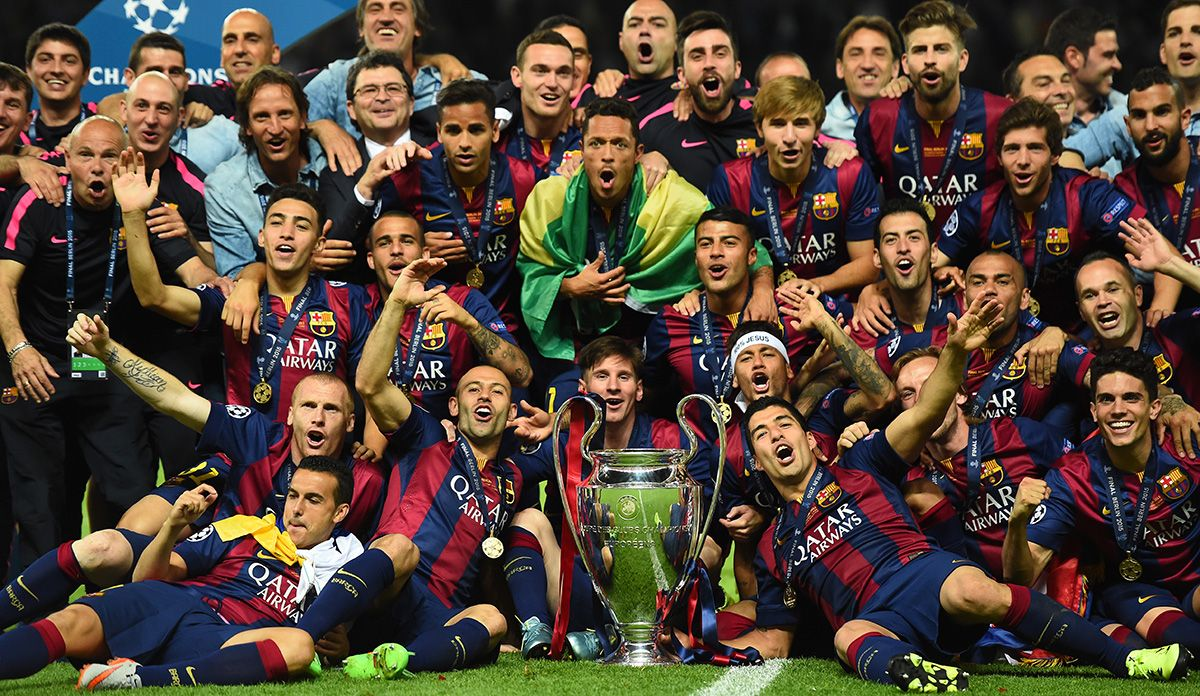

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [9]:
obj = RetinaFace.detect_faces(img)


24-09-09 08:21:23 - Directory /root/.deepface created
24-09-09 08:21:23 - Directory /root/.deepface/weights created
24-09-09 08:21:23 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 225MB/s] 


In [10]:
obj

{'face_1': {'score': 0.9994980692863464,
  'facial_area': [31, 39, 82, 100],
  'landmarks': {'right_eye': [45.271477, 60.08742],
   'left_eye': [69.60453, 61.81431],
   'nose': [56.981888, 71.83088],
   'mouth_right': [44.868565, 81.025925],
   'mouth_left': [67.327126, 82.474335]}},
 'face_2': {'score': 0.9994916319847107,
  'facial_area': [220, 15, 269, 82],
  'landmarks': {'right_eye': [228.26828, 42.085182],
   'left_eye': [252.06195, 40.409115],
   'nose': [237.73634, 51.88497],
   'mouth_right': [231.72658, 65.95168],
   'mouth_left': [251.12383, 64.66401]}},
 'face_3': {'score': 0.9994088411331177,
  'facial_area': [736, 341, 784, 402],
  'landmarks': {'right_eye': [746.04596, 358.20688],
   'left_eye': [768.45685, 354.32962],
   'nose': [757.1016, 363.75366],
   'mouth_right': [751.3754, 383.1922],
   'mouth_left': [769.2763, 380.13864]}},
 'face_4': {'score': 0.9993940591812134,
  'facial_area': [1080, 28, 1120, 93],
  'landmarks': {'right_eye': [1109.1506, 56.340874],
   'lef

In [11]:
obj.keys()

dict_keys(['face_1', 'face_2', 'face_3', 'face_4', 'face_5', 'face_6', 'face_7', 'face_8', 'face_9', 'face_10', 'face_11', 'face_12', 'face_13', 'face_14', 'face_15', 'face_16', 'face_17', 'face_18', 'face_19', 'face_20', 'face_21', 'face_22', 'face_23', 'face_24', 'face_25', 'face_26', 'face_27', 'face_28', 'face_29', 'face_30', 'face_31', 'face_32', 'face_33', 'face_34', 'face_35', 'face_36'])

In [12]:
len(obj.keys())

36

In [13]:
for key in obj.keys():
  identity = obj[key]
  print(identity)

  break

{'score': 0.9994980692863464, 'facial_area': [31, 39, 82, 100], 'landmarks': {'right_eye': [45.271477, 60.08742], 'left_eye': [69.60453, 61.81431], 'nose': [56.981888, 71.83088], 'mouth_right': [44.868565, 81.025925], 'mouth_left': [67.327126, 82.474335]}}


In [15]:
for key in obj.keys():
  identity = obj[key]
  facial_area = identity['facial_area']
  cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 1)

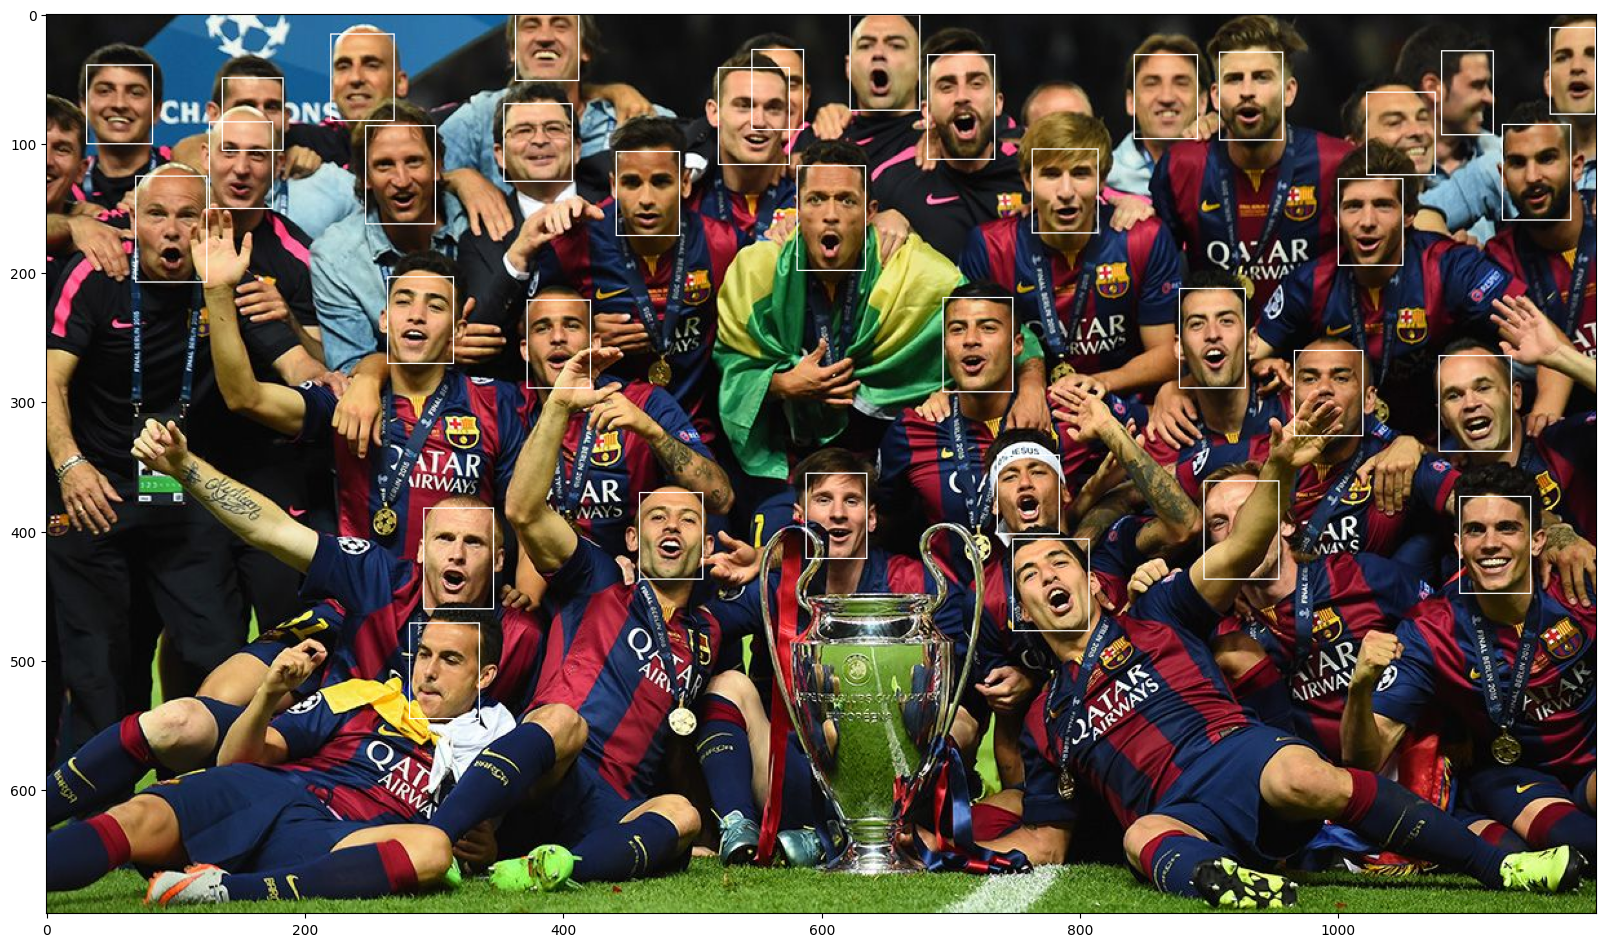

In [18]:
plt.figure(figsize = (20, 20))
plt.imshow(img[:,:,::-1])
plt.show()

***Face Recognition***

In [21]:
from deepface import DeepFace

In [24]:
obj2 = DeepFace.verify(img1_path = 'm10.jpg', img2_path = 'goat.jpeg', model_name = 'ArcFace', detector_backend = 'retinaface')

In [25]:
obj2

{'verified': True,
 'distance': 0.3962296179071363,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 402,
   'y': 140,
   'w': 136,
   'h': 194,
   'left_eye': (502, 216),
   'right_eye': (441, 213)},
  'img2': {'x': 319,
   'y': 33,
   'w': 79,
   'h': 115,
   'left_eye': (373, 74),
   'right_eye': (337, 73)}},
 'time': 17.91}

In [27]:
obj3 = DeepFace.verify(img1_path = 'aguero.jpg', img2_path = 'alvarez.jpg', model_name = 'ArcFace', detector_backend = 'retinaface')

In [28]:
obj3

{'verified': False,
 'distance': 0.9258806735397704,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 594,
   'y': 61,
   'w': 128,
   'h': 172,
   'left_eye': (704, 120),
   'right_eye': (655, 123)},
  'img2': {'x': 459,
   'y': 71,
   'w': 130,
   'h': 175,
   'left_eye': (550, 139),
   'right_eye': (490, 135)}},
 'time': 24.28}

In [30]:
obj4 = DeepFace.verify(img1_path = 'm10.jpg', img2_path = 'aguero.jpg', model_name = 'ArcFace', detector_backend = 'retinaface')

In [31]:
obj4

{'verified': True,
 'distance': 0.6755948481891355,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 402,
   'y': 140,
   'w': 136,
   'h': 194,
   'left_eye': (502, 216),
   'right_eye': (441, 213)},
  'img2': {'x': 594,
   'y': 61,
   'w': 128,
   'h': 172,
   'left_eye': (704, 120),
   'right_eye': (655, 123)}},
 'time': 17.64}

In [33]:
obj5 = DeepFace.verify(img1_path = 'm10.jpg', img2_path = 'alvarez.jpg', model_name = 'ArcFace', detector_backend = 'retinaface')

In [34]:
obj5

{'verified': False,
 'distance': 0.8688404621543548,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 402,
   'y': 140,
   'w': 136,
   'h': 194,
   'left_eye': (502, 216),
   'right_eye': (441, 213)},
  'img2': {'x': 459,
   'y': 71,
   'w': 130,
   'h': 175,
   'left_eye': (550, 139),
   'right_eye': (490, 135)}},
 'time': 17.88}